____
# Modul 0



## *Flyttal, Machine epsilon, kanceleringsfel*


### *Print machine epsilon:*

In [286]:
import numpy as np

machine_epsilon = np.finfo(float).eps
print (machine_epsilon)

2.220446049250313e-16


## Show cancellation error


In [287]:
h = 1.0e-12

def f(x):
    return np.sqrt(x)

print(f'f(2+h) = {f(2+h)}')
print(f'\n f(2) = {f(2)}')

f(2+h) = 1.4142135623734486

 f(2) = 1.4142135623730951


### Differenskvoten jmf. med exakt värde:

In [288]:

Differenskvot = (f(2+h) - f(2)) / h
Exakt = 1/2/np.sqrt(2)
diff = Differenskvot - Exakt

print(f'Differenskvot = {Differenskvot}')
print(f'Exakt = {Exakt}')
print(f'Diff = {diff}')


Differenskvot = 0.35349501104064984
Exakt = 0.35355339059327373
Diff = -5.837955262388839e-05


Skriv om mha algebra för att få derivatan som:

In [289]:
Diffkvot_refined = 1 / (f(2+h) + f(2))
ny_diff = Diffkvot_refined - Exakt

print(f'Diff = {ny_diff}')



Diff = -4.418687638008123e-14


___
# *Modul 1*


### Enkelt matplotlib exempel. 
Jag gillade speciellt att göra en "rita funktion"


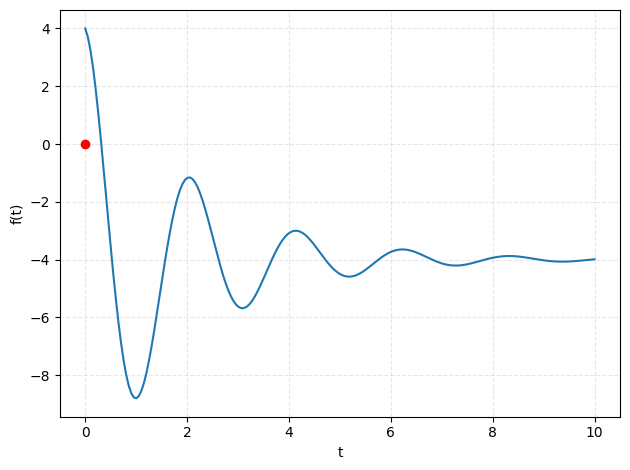

In [290]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable

def draw(f: Callable, a: float, b: float, n: int, xlabel: str, ylabel: str, keypoint_x: float = 0, keypoint_y: float = 0) -> None:
    """ Plots the function f on the interval [a, b] with n points.
    If keypoint_x and keypoint_y are provided, marks that point on the plot.
    """
    
    x = np.linspace(a, b, n)
    y = f(x)
    fig, ax = plt.subplots()
    ax.plot(x, y)
    
    # plot settings
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    fig.tight_layout()

    if keypoint_x is not None and keypoint_y is not None:
        plt.plot(keypoint_x, keypoint_y, 'ro')  # mark the key point in red

    plt.show()

def main():
    def f(t):
        return 8*np.exp(-t/2)*np.cos(3*t)-4

    draw(f, 0, 10, 200, 't', 'f(t)')

if __name__ == '__main__':
    main()



## Bisection Method

In [291]:
from dataclasses import dataclass
from typing import Callable
@dataclass
class Result:
    f: float      # f(c)
    c: float      # midpoint
    k: int        # iteration

def bisection(f: Callable, a: float, b: float, tolerance: float) \
        -> tuple[list[Result], float]:
    """Bisection method: iteration history and final error estimate.
    
    Args:
        f: continuous function with root in [a,b]
        a, b: endpoints with f(a)*f(b) < 0
        tolerance: stopping criterion for |b-a|
    
    Returns:
        results: list[Result] with f(c), c, iteration k
        e_x: final error estimate = |b-a|/2
    """
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) and f(b) must have opposite signs")
    
    results = []
    k = 0
    DeltaX = abs(b - a)
    while DeltaX > tolerance:
        c = (a + b) / 2
        if f(c) == 0:
            # Found exact root
            results.append(Result(f=f(c), c=c, k=k))
            return results, 0.0
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
        DeltaX = abs(b - a)
        k += 1
        results.append(Result(f=f(c), c=c, k=k))
    
    return results, DeltaX/2


Låt f(x) = x - 4sin(2x) - 243/80. Beräkna approximativt en rot till f i närheten av x=3 och x=7
med bisection method med 6 korrekta decimaler.

  k             c           f(c)
---  ------------  -------------
  1  3.1000000000   0.3948576113
  2  3.1500000000   0.0452443981
  3  3.1750000000  -0.1295599661
  4  3.1625000000  -0.0422100344
  5  3.1562500000   0.0015080224
  6  3.1593750000  -0.0203537839
  7  3.1578125000  -0.0094235142
  8  3.1570312500  -0.0039578967
  9  3.1566406250  -0.0012249739
 10  3.1564453125   0.0001415152
 11  3.1565429688  -0.0005417316
 12  3.1564941406  -0.0002001088
 13  3.1564697266  -0.0000292969
 14  3.1564575195   0.0000561091
 15  3.1564636230   0.0000134061
 16  3.1564666748  -0.0000079454

Approximate root: 3.156467
Number of iterations: 16
Estimated error: 1.5258789063388178e-06


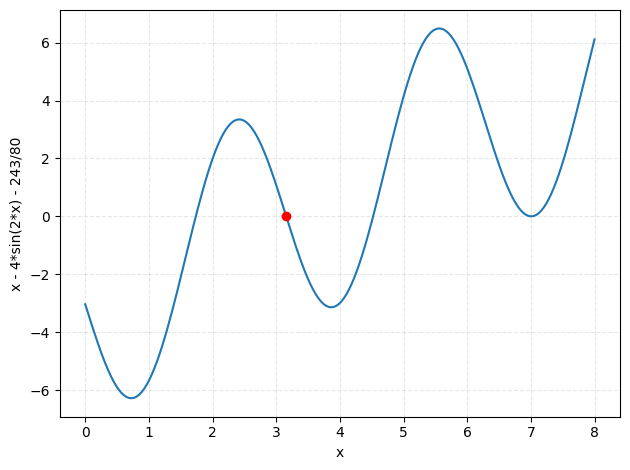

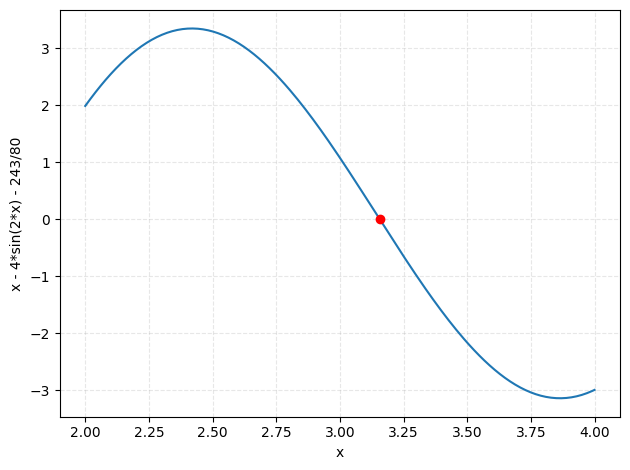

In [292]:
from tabulate import tabulate

def f(x) -> float:
    return x - 4*np.sin(2*x) - 243/80


Results, e_x = bisection(f, 3, 3.2, 0.5e-5 )
tabulate_data = [(res.k, res.c, res.f) for res in Results]

print(tabulate(tabulate_data, headers=['k', 'c', 'f(c)'], \
            stralign='center', numalign='right', floatfmt=".10f"))

iteration = Results[-1].k

print(f'\nApproximate root: {np.round(Results[-1].c, 6)}')
print(f'Number of iterations: {iteration}')
print(f'Estimated error: {e_x}')

draw(f, 0, 8, 200, 'x', 'x - 4*sin(2*x) - 243/80', keypoint_x=Results[-1].c, keypoint_y=f(Results[-1].c))
draw(f, 2, 4, 200, 'x', 'x - 4*sin(2*x) - 243/80', keypoint_x=Results[-1].c, keypoint_y=f(Results[-1].c))

## Fixed point iteration method

In [293]:

@dataclass
class FixedPointResult:
    xs: list[float]
    ns: list[int]
    deltaX: list[float]


def fixed_point_iteration(
    g: Callable[[float], float],
    x0: float,
    tolerance: float,
    max_iterations: int,
) -> FixedPointResult:
    xs: list[float] = []
    ns: list[int] = []
    deltaX: list[float] = []

    """
    Fixed point iteration to find a fixed point of g starting from x0.
    Args:
        g: function for fixed point iteration
        x0: initial guess
        tolerance: convergence tolerance
        max_iterations: maximum number of iterations
    Returns:
        FixedPointResult containing the list of approximations and iteration counts
    Raises:
        RuntimeError: if the method does not converge within max_iterations

    """


    x = x0
    DeltaX = tolerance + 1.0
    n = 0

    while DeltaX > tolerance and n < max_iterations:
        xs.append(x)
        ns.append(n)
        deltaX.append(DeltaX)

        xold = x
        x = g(xold)
        DeltaX = float(np.abs(x - xold))
        n += 1

    if n >= max_iterations and DeltaX > tolerance:
        raise RuntimeError("Fixed point iteration did not converge within max_iterations.")

    return FixedPointResult(xs=xs, ns=ns, deltaX=deltaX)


### Example of fixed point iteration: 
Hitta en reell rot till f(x) = x^3 + 4x + 3. Antag tolerans 10e-10. 
Här använder vi omskrivning av ekvationen f(x)=0 till x=g(x) med g(x) = -(x^3 + 3)/4 och en inital gissning x0 = 1000 som är långt från den faktiska roten.

Approximate root: -0.6735930586 found after 14 iterations.
  Iteration    Approximation          Delta X           g(x)                   f(x)
-----------  ---------------  ---------------  -------------  ---------------------
          0  1000.0000000000     1.0000000010  -0.0000030000  1000004003.0000000000
          1    -0.0000030000  1000.0000030000  -0.7500000000           2.9999880000
          2    -0.7500000000     0.7499970000  -0.6575342466          -0.4218750000
          3    -0.6575342466     0.0924657534  -0.6768416596           0.0855772370
          4    -0.6768416596     0.0193074130  -0.6729302065          -0.0174377064
          5    -0.6729302065     0.0039114531  -0.6737280761           0.0035527817
          6    -0.6737280761     0.0007978696  -0.6735655464          -0.0007238923
          7    -0.6735655464     0.0001625296  -0.6735986637           0.0001474941
          8    -0.6735986637     0.0000331173  -0.6735919161          -0.0000300522
          9    -0

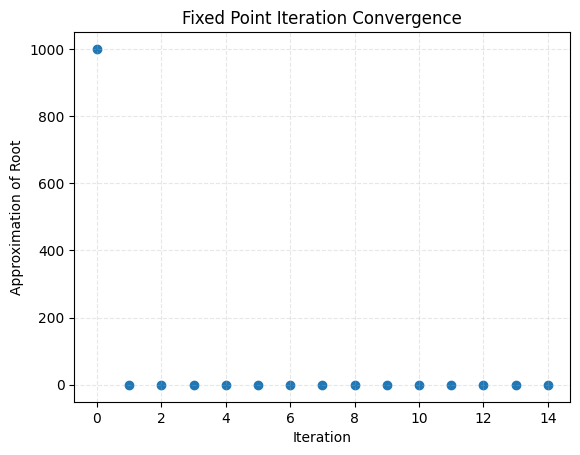

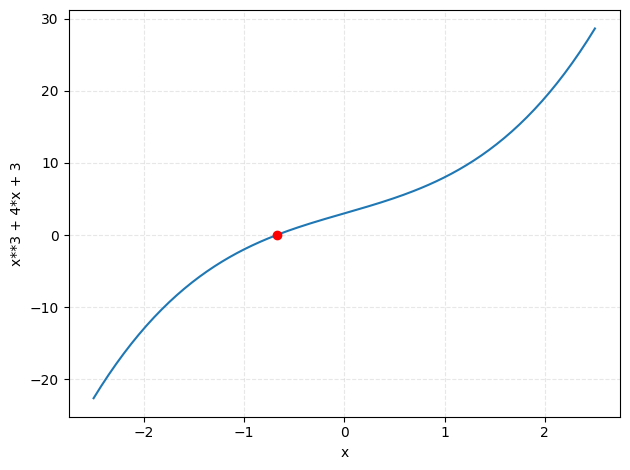

In [294]:

def f(x: float) -> float:
    """ Function for which we want to find a root. """
    return x**3 + 4*x + 3

def g(x: float) -> float:
    """ Rearranged f(x) = 0 for fixed point iteration. """
    return - 3 / (x**2 + 4)

initial_guess = 1000 # A reasonable initial guess, good idea to plot f(x) first to find a reasonable guess
tolerance = 10e-10
max_iterations = 100

results = fixed_point_iteration(g, x0=initial_guess, tolerance=tolerance, max_iterations=max_iterations)

f_of_x = lambda: [f(xi) for xi in results.xs] # noqa: E731
g_of_x = lambda: [g(xi) for xi in results.xs] # noqa: E731

print(f'Approximate root: {np.round(results.xs[-1], 10)} found after {results.ns[-1]} iterations.')
print(tabulate(zip(results.ns, results.xs, results.deltaX, g_of_x(), f_of_x()), headers=['Iteration', 'Approximation', 'Delta X', 'g(x)', 'f(x)'], floatfmt=".10f"))

plt.scatter(results.ns, results.xs, label='Fixed Point Iteration')
plt.xlabel('Iteration')
plt.ylabel('Approximation of Root')
plt.title('Fixed Point Iteration Convergence')
plt.grid(True, linestyle='--', alpha=0.3)


draw(f, -2.5, 2.5, 200, 'x', 'x**3 + 4*x + 3', keypoint_x=results.xs[-1], keypoint_y=f(results.xs[-1]))

Märk vad som händer om vi använder g(x) = -(x^3+3)/4 istället. x0 = 1000 ger overflow i detta fall. Metoden konvergerar inte för denna initiala gissning! 
Om vi istället väljer x0 = -1 så konvergerar båda omskrivningarna. Men den första omskrivningen konvergerar snabbare även om den initiala gissningen är långt från roten.

Alltså är omskrivningen viktig för konvergensen. 


Approximate root: -0.6735930577 found after 19 iterations.
  Iteration    Approximation       Delta X           g(x)           f(x)
-----------  ---------------  ------------  -------------  -------------
          0    -1.0000000000  1.0000000010  -0.5000000000  -2.0000000000
          1    -0.5000000000  0.5000000000  -0.7187500000   0.8750000000
          2    -0.7187500000  0.2187500000  -0.6571731567  -0.2463073730
          3    -0.6571731567  0.0615768433  -0.6790455798   0.0874896921
          4    -0.6790455798  0.0218724230  -0.6717225286  -0.0292922048
          5    -0.6717225286  0.0073230512  -0.6742278254   0.0100211874
          6    -0.6742278254  0.0025052969  -0.6733768460  -0.0034039176
          7    -0.6733768460  0.0008509794  -0.6736666107   0.0011590586
          8    -0.6736666107  0.0002897646  -0.6735680259  -0.0003943391
          9    -0.6735680259  0.0000985848  -0.6736015763   0.0001342016
         10    -0.6736015763  0.0000335504  -0.6735901595  -0.000

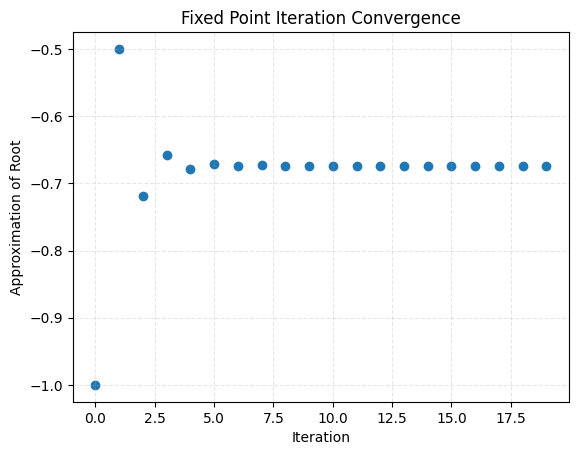

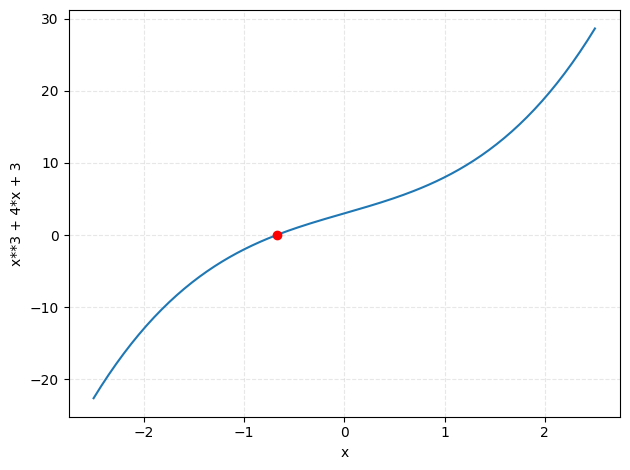

In [295]:

def f(x: float) -> float:
    """ Function for which we want to find a root. """
    return x**3 + 4*x + 3

def g(x: float) -> float:
    """ Rearranged f(x) = 0 for fixed point iteration. """
    return (- (x**3 + 3) / 4)

initial_guess = -1 # A reasonable initial guess, good idea to plot f(x) first to find a reasonable guess
tolerance = 10e-10
max_iterations = 100

results = fixed_point_iteration(g, x0=initial_guess, tolerance=tolerance, max_iterations=max_iterations)

f_of_x = lambda: [f(xi) for xi in results.xs] # noqa: E731
g_of_x = lambda: [g(xi) for xi in results.xs] # noqa: E731

print(f'Approximate root: {np.round(results.xs[-1], 10)} found after {results.ns[-1]} iterations.')
print(tabulate(zip(results.ns, results.xs, results.deltaX, g_of_x(), f_of_x()), headers=['Iteration', 'Approximation', 'Delta X', 'g(x)', 'f(x)'], floatfmt=".10f"))

plt.scatter(results.ns, results.xs, label='Fixed Point Iteration')
plt.xlabel('Iteration')
plt.ylabel('Approximation of Root')
plt.title('Fixed Point Iteration Convergence')
plt.grid(True, linestyle='--', alpha=0.3)


draw(f, -2.5, 2.5, 200, 'x', 'x**3 + 4*x + 3', keypoint_x=results.xs[-1], keypoint_y=f(results.xs[-1]))

## Newton-Raphson Method
x_k+1 = x_k - f(x_k) / f'(x_k)

In [296]:

@dataclass
class NewtonRaphsonResult:
    xs: list[float]
    deltas: list[float]
    ns: list[int]

def NewtonRaphson(f_of_x: Callable, x0: float, tolerance: float, max_iterations: int) ->     NewtonRaphsonResult:
    ns: list[int] = []
    xs: list[float] = []
    deltas: list[float] = []
    
    """
    Newton-Raphson method to find a root of f starting from x0.
    Args:
        f: One variabe function that returns a tuple (f(x), f'(x))
        x0: initial guess
        tolerance: convergence tolerance
        max_iterations: maximum number of iterations
    Returns:
        Dataclass containing the list of approximations, deltas, and iteration counts

    """


    x = x0
    DeltaX = tolerance + 1.0
    n = 0

    xs.append(x)
    deltas.append(DeltaX)
    ns.append(n)


    while DeltaX > tolerance and n < max_iterations:
        n += 1
        f, df = f_of_x(x) 
        x_new = x - (f / df)
        DeltaX = np.abs(x_new - x)
        x = x_new

        ns.append(n)
        xs.append(x)
        deltas.append(DeltaX)

    return NewtonRaphsonResult(xs=xs, deltas=deltas, ns=ns)


  Iteration    Approximation       Delta X
-----------  ---------------  ------------
          0    -2.0000000000  1.0000000010
          1    -1.1875000000  0.8125000000
          2    -0.7714167062  0.4160832938
          3    -0.6772592807  0.0941574255
          4    -0.6735981289  0.0036611518
          5    -0.6735930582  0.0000050707
          6    -0.6735930582  0.0000000000
Approximate root: x* = -0.6735930582 found after 6 iterations.
f(x*) = 0.0


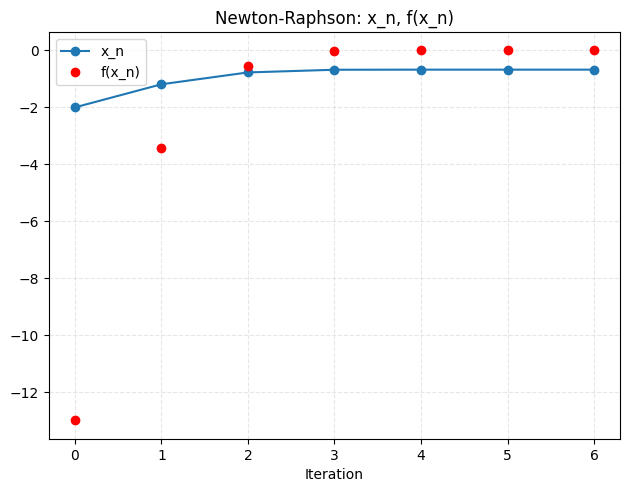

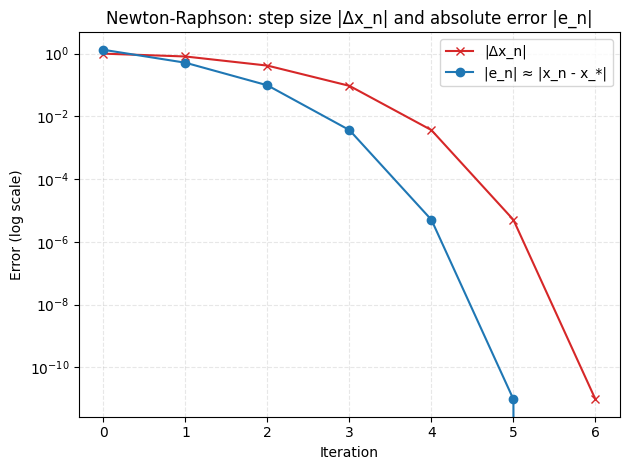

In [334]:
def func(x: float) -> tuple[float, float]:
    f = x**3 + 4*x + 3
    df = 3*x**2 + 4
    return f, df


result = NewtonRaphson(func, x0=-2, tolerance=10e-10, max_iterations=100)

print(tabulate(zip(result.ns, result.xs, result.deltas),
               headers=['Iteration', 'Approximation', 'Delta X'],
               floatfmt=".10f"))
print(f'Approximate root: x* = {np.round(result.xs[-1], 10)} found after {result.ns[-1]} iterations.')
print(f'f(x*) = {func(result.xs[-1])[0]}')

# --------- Figure 1: x_n, f(x_n), and |Δx_n| on secondary axis ---------

fig1, ax1 = plt.subplots()

# x_n vs iteration
ax1.plot(result.ns, result.xs, marker='o', label='x_n')
ax1.plot(
    result.ns,
    [func(result.xs[i])[0] for i in range(len(result.xs))],
    'ro',
    label='f(x_n)'
)
ax1.set_xlabel('Iteration')
ax1.grid(True, linestyle='--', alpha=0.3)
ax1.legend(loc='best')


# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()

fig1.tight_layout()
plt.title('Newton-Raphson: x_n, f(x_n)')
plt.show()

# --------- Figure 2: |Δx_n| and |e_n| on the same graph ---------

root_approx = result.xs[-1]
errors = np.abs(np.array(result.xs) - root_approx)  # |e_n| ≈ |x_n - x_*|

fig2, ax = plt.subplots()

ax.semilogy(result.ns, result.deltas, marker='x', color='tab:red', label='|Δx_n|')
ax.semilogy(result.ns, errors, marker='o', color='tab:blue', label='|e_n| ≈ |x_n - x_*|')

ax.set_xlabel('Iteration')
ax.set_ylabel('Error (log scale)')
ax.set_title('Newton-Raphson: step size |Δx_n| and absolute error |e_n|')
ax.grid(True, linestyle='--', alpha=0.3)
ax.legend(loc='best')

fig2.tight_layout()
plt.show()
